# Plot

## Librairies

In [1]:
import os

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# plt.style.use('ggplot')

## Plots

In [2]:
# Choose your run file
file = os.path.join(os.getcwd(), "new_simul_26.csv")
df = pd.read_csv(file, header="infer")

In [3]:
df

,memory_length,nb_attractors,min_attractors,max_attractors,eta,tick
0,1,45,45,45,0.1500,0
1,1,45,45,45,0.1500,0
2,1,45,45,45,0.1500,0
3,1,45,45,45,0.1500,0
4,1,45,45,45,0.1500,0
...,...,...,...,...,...,...
2995,565,28,28,45,0.1500,0
2996,564,28,28,45,0.1500,0
2997,563,209,28,209,0.0075,0
2998,562,209,28,209,0.0075,0


In [4]:
steps = df.index.values                     # List of simulation steps (x-axis)
ticks = df["tick"].values.nonzero()[0]      # List of ticks (memory data points)
memory = df["memory_length"].values         # List of memory size values
nb_attractors = df["nb_attractors"].values  # List of number of attractors
learning_rates = df["eta"].values           # List of learning rates

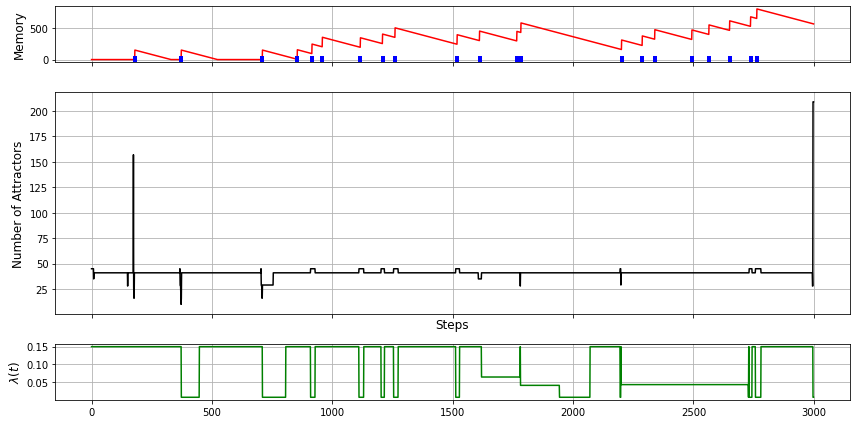

In [5]:
import matplotlib.pyplot as plt

# Create a figure and set of subplots with custom heights for each row
fig, (ax2, ax1, ax3) = plt.subplots(3, 1, figsize=(12, 6), sharex=True, gridspec_kw={'height_ratios': [0.5, 2, 0.5]})

# Plot the memory on the first subplot (ax2), which is the shorter plot
ax2.plot(steps, memory, color='red', alpha=1)
# Add vertical lines at each tick in ax1
for tick in ticks:
    ax2.axvline(x=tick, ymin=0, ymax=0.075, linewidth=4, color='blue')
ax2.set_ylabel('Memory', size=12)
ax2.tick_params(axis='y')
ax2.grid(True)

# Plot the number of attractors on the second subplot (ax1), which is the taller plot
ax1.plot(steps, nb_attractors, color='black', label='Number of Attractors')
ax1.set_xlabel('Steps', size=12)
ax1.set_ylabel('Number of Attractors', size=12)
ax1.tick_params(axis='y')
ax1.grid(True)

# Plot the learning rates
ax3.plot(steps, learning_rates, color='green', alpha=1)
ax3.set_ylabel('$\lambda(t)$', size=12)
ax3.tick_params(axis='y')
ax3.grid(True)

# Adjust layout to prevent overlap
fig.tight_layout()

# Show the plot
plt.show()


In [ ]:
np.set_printoptions(suppress=True)

bounds=(-0.5, 0.5)
A_default = np.random.normal(0, 1, size=(5, 6))
print("A_default\n", np.round(A_default, 2))
mask = np.random.randint(0,2, size=(5, 6), dtype=bool)      # XXX
A_default = A_default * mask
print("A_default\n", np.round(A_default, 2))
dim = A_default.shape[0], A_default.shape[1]
mu_A = 100*np.random.normal(0, 1, size=dim)
sigma2_A = np.abs(np.random.normal(0, 1, size=dim))
mu_A
A = np.random.normal(mu_A, sigma2_A, size=dim)
A = A * mask
print("A\n", np.round(A, 2))
A = np.maximum(A, A_default + bounds[0])  # clipping values (adding negative bound)
A = np.minimum(A, A_default + bounds[1])  # clipping values (adding positive bound)
print("clipped A\n", np.round(A, 2))

A_default
 [[-0.5  -1.21 -0.23  0.82  2.3   1.16]
 [ 1.3  -0.94  0.1   0.53  1.16  1.01]
 [-0.5  -1.17 -0.28  1.16  0.94  0.99]
 [ 1.01  0.68 -0.1  -1.1  -1.33  1.19]
 [ 0.24 -0.61  0.01  0.23 -0.49 -0.85]]
A_default
 [[-0.5  -1.21 -0.23  0.    0.    1.16]
 [ 0.   -0.    0.    0.53  0.    1.01]
 [-0.5  -0.   -0.    1.16  0.    0.  ]
 [ 1.01  0.   -0.1  -1.1  -1.33  0.  ]
 [ 0.   -0.    0.    0.   -0.   -0.  ]]
A
 [[ 142.24 -142.68  119.33    0.     -0.     71.81]
 [   0.     -0.      0.     72.8    -0.   -106.26]
 [  -3.45   -0.     -0.    118.79    0.      0.  ]
 [ 145.24   -0.     11.51   52.62 -156.51    0.  ]
 [   0.     -0.     -0.      0.     -0.     -0.  ]]
clipped A
 [[-0.   -1.71  0.27  0.   -0.    1.66]
 [ 0.   -0.    0.    1.03 -0.    0.51]
 [-1.   -0.   -0.    1.66  0.    0.  ]
 [ 1.51 -0.    0.4  -0.6  -1.83  0.  ]
 [ 0.   -0.   -0.    0.   -0.   -0.  ]]


In [17]:
# to be continued

In [ ]:

def GSP(A_default, mu_A, sigma2_A, bounds=(-0.5, 0.5)):
    """
    Applies a global stochastic plasticity rule to (non-interactive) connections in matrix A.
    Each non-zero weight a_ij of A is sampled in the normal distribution N(mu_ij, sigma2_ij)
    If A stretches beyond the bounds [A_default + bounds[0], A_default + bounds[0]], then it is clipped.
    
    Args:
        A_default (np.ndarray): Default (initial) weight matrix for bounding weight changes.
        mu_A (np.ndarray): Matrix of means w.r.t. which the new weights will be sampled.
        sigma2_A (np.ndarray): Matrix of variances w.r.t. which the new weights will be sampled.
        bounds (tuple, optional): Tuple of lower and upper bounds for weight changes. Defaults to (-0.5, 0.5).

    Returns:
        np.ndarray: Updated weight matrix A.
    """

    mask = A_default != 0
    dim = A_default.shape[0], A_default.shape[1]
    A = np.random.normal(mu_A, sigma2_A, size=dim)
    A = A * mask
    A = np.maximum(A, A_default + bounds[0])  # clipping values (adding negative bound)
    A = np.minimum(A, A_default + bounds[1])  # clipping values (adding positive bound)
    
    return A_default, A, mu_A, sigma2_A

In [69]:
A_default = np.random.normal(size=(5, 5)) * np.random.randint(0, 2, size=(5, 5))
mu_A = np.random.normal(size=(5, 5))
sigma2_A = np.abs(np.random.normal(size=(5, 5)) / 100)

In [70]:
GSP(A_default, mu_A, sigma2_A, bounds=(-0.5, 0.5))

(array([[ 0.        , -0.        , -0.        ,  0.        , -0.        ],
        [-1.17235258, -0.        , -0.        , -0.        , -0.        ],
        [-1.83834613, -0.        , -0.        ,  0.54977737, -0.87115663],
        [ 0.14257683, -0.        , -0.86668202,  0.5807837 ,  0.        ],
        [ 2.54412863,  0.        , -0.        , -1.27165942, -0.53520857]]),
 array([[-0.        , -0.        , -0.        , -0.        ,  0.        ],
        [-0.67235258, -0.        ,  0.        , -0.        ,  0.        ],
        [-1.33834613, -0.        , -0.        ,  1.04977737, -0.68119892],
        [-0.35742317, -0.        , -0.36668202,  0.0807837 ,  0.        ],
        [ 2.04412863,  0.        , -0.        , -0.77165942, -1.03520857]]),
 array([[-0.12562783, -2.46664143, -0.05185804, -0.61114069,  1.19573858],
        [ 0.73404783, -0.86112803,  0.67487172, -0.30577202,  1.51541275],
        [-0.26212041, -0.90689967, -0.10500866,  1.78595086, -0.67013439],
        [-1.10910593,